# Project 2 - Jane Hawkins
### Tornadoes!!

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Exploration

#### Data:

*yr* - 4-digit year

*mn* - Month (1-12)

*dy* - Day of month

*date* - Datetime object (e.g. 1950-01-01)

*st* - State where tornado originated; 2-digit abbreviation

*mag* - F rating thru Jan 2007; EF rating after Jan 2007 (-9 if unknown rating)

*inj* - Number of injuries

*fat* - Number of fatalities

*slat* - Starting latitude in decimal degrees

*slon* - Starting longitude in decimal degrees

*elat* - Ending latitude in decimal degrees (value of 0 if missing)

*elon* - Ending longitude in decimal degrees (value of 0 if missing)

*len* - Length of track in miles

*wid* - Width in yards

In [2]:
tornadoes = pd.read_csv('us_tornado_dataset_1950_2021.csv')
tornadoes.tail(10)

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
67548,2021,12,29,2021-12-29,GA,0,0,0,34.3433,-84.8541,34.3457,-84.8205,1.93,100
67549,2021,12,29,2021-12-29,GA,0,0,0,34.1760,-83.9808,34.1692,-83.9469,2.00,75
67550,2021,12,29,2021-12-29,GA,1,0,0,34.3022,-84.4754,34.3012,-84.4673,0.48,100
67551,2021,12,30,2021-12-30,GA,0,0,0,32.2300,-83.5900,32.2200,-83.4200,10.10,200
67552,2021,12,30,2021-12-30,GA,1,0,0,31.1087,-83.7293,31.1184,-83.6658,3.82,150
67553,2021,12,30,2021-12-30,GA,1,0,0,31.1703,-83.3804,31.1805,-83.3453,2.19,150
67554,2021,12,30,2021-12-30,GA,1,0,0,31.6900,-82.7300,31.7439,-82.5412,11.71,300
67555,2021,12,31,2021-12-31,AL,1,0,0,34.2875,-85.7878,34.2998,-85.7805,0.95,50
67556,2021,12,31,2021-12-31,GA,1,0,0,33.7372,-84.9998,33.7625,-84.9633,2.75,150
67557,2021,12,31,2021-12-31,GA,1,6,0,33.5676,-83.9877,33.5842,-83.9498,2.50,75


In [3]:
# Clean up unknown values
unknown_mag = tornadoes[tornadoes['mag'] == -9].index
tornadoes_clean = tornadoes.loc[~tornadoes.index.isin(unknown_mag)]
tornadoes_clean['date'] = pd.to_datetime(tornadoes_clean['date'])

/var/folders/kp/ts5ycnj15r769yyfz91zfmhw0000gn/T/ipykernel_11433/1039214437.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tornadoes_clean['date'] = pd.to_datetime(tornadoes_clean['date'])


### Analyze 'mag' Column (in Fujita Scale)

##### Understanding Fujita vs. Enhances Fujita scales

![picTitle](fujita_scale.png)

#### Exploring Differences in Variables

In [4]:
fujita_scale = tornadoes_clean[tornadoes_clean['yr'] < 2007]
fujita_scale.value_counts('mag')

mag
0    21761
1    16873
2     7971
3     2143
4      498
5       50
Name: count, dtype: int64

In [5]:
enhanced_fujita = tornadoes_clean[tornadoes_clean['yr'] >= 2017]
enhanced_fujita.value_counts('mag') # get rid of -9 (unknown rating)

mag
0    2911
1    2354
2     516
3      97
4      14
Name: count, dtype: int64

<Figure size 300x300 with 0 Axes>

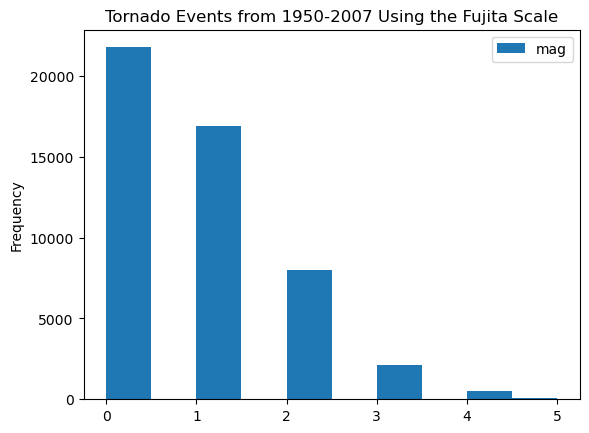

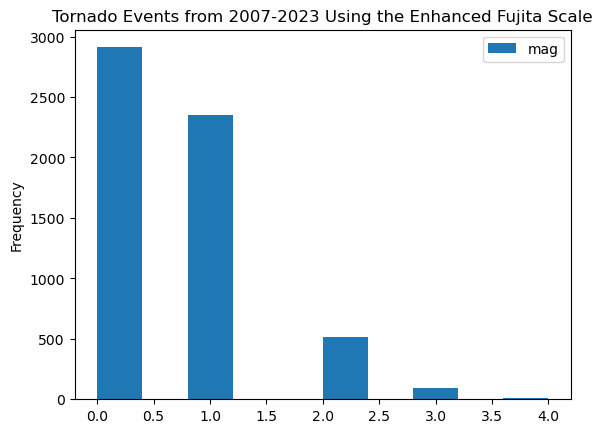

In [6]:
plt.figure(figsize=(3, 3))

# Analyzing the data for the Fujita Scale values and the Enhanced Fujita Scale values.
fujita_scale[['mag']].plot(kind='hist')
plt.title('Tornado Events from 1950-2007 Using the Fujita Scale')
enhanced_fujita[['mag']].plot(kind='hist')
plt.title('Tornado Events from 2007-2023 Using the Enhanced Fujita Scale')

plt.show()

I concluded through this exploration of the fujita scale and enhanced fujita scale that both scales classify each tornado in a similar ratio, yet they are different enough that it could affect my prediction and inferences later on. With this I will only be using the Fujita Scale portion for the rest of the analysis.

### Start exploring different plots

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

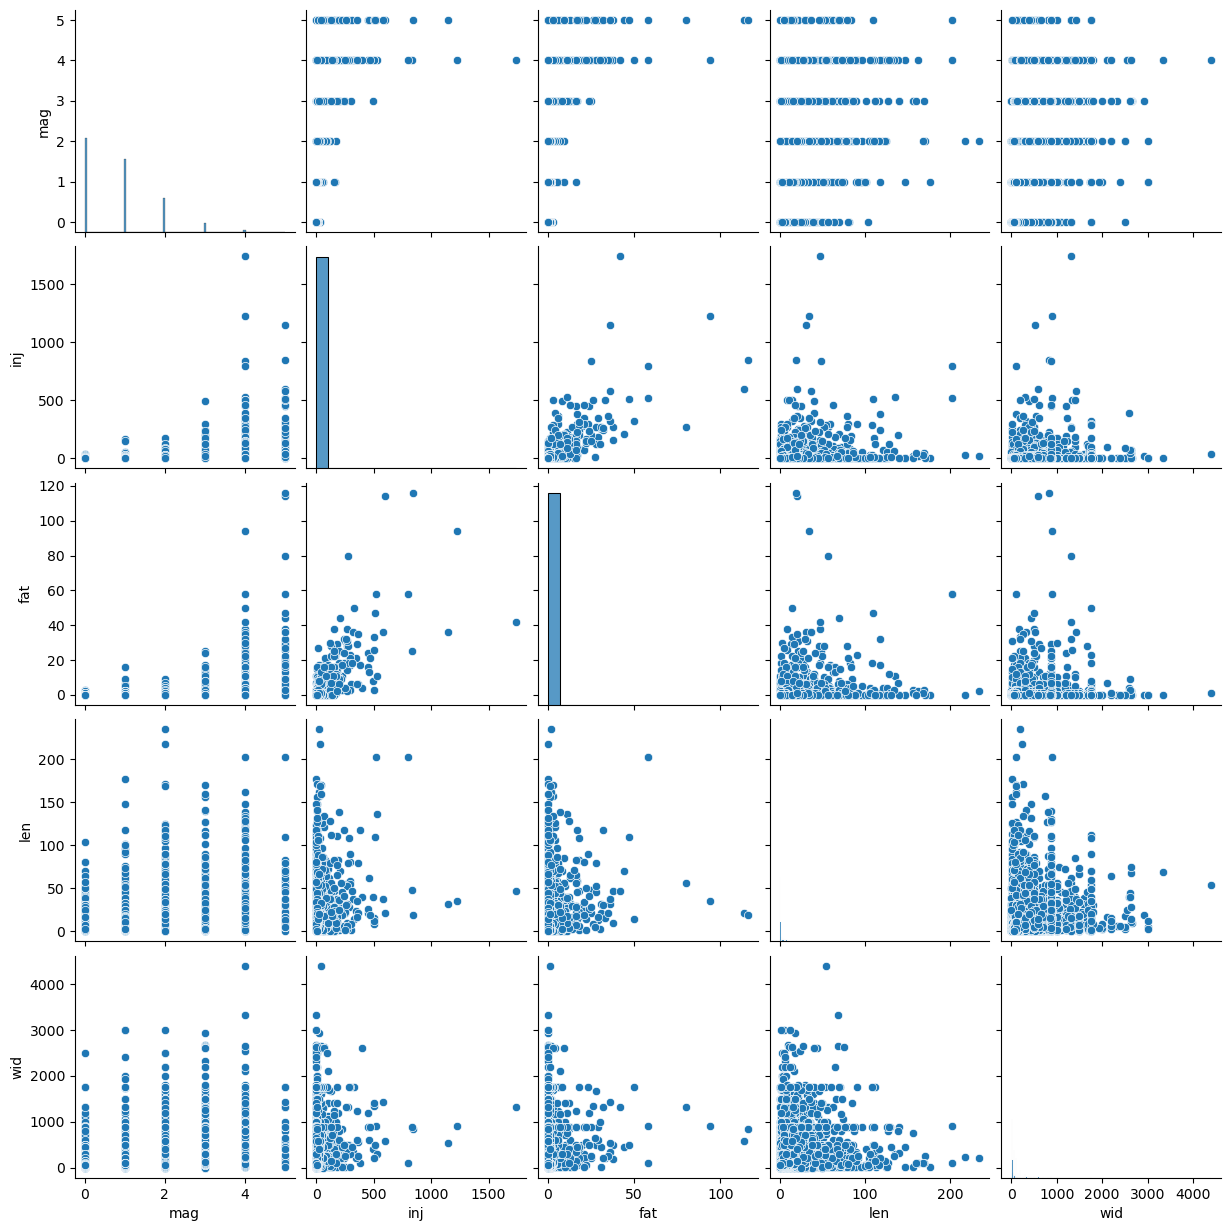

In [7]:
sns.pairplot(fujita_scale[['date', 'st', 'mag', 'inj', 'fat', 'len', 'wid']])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


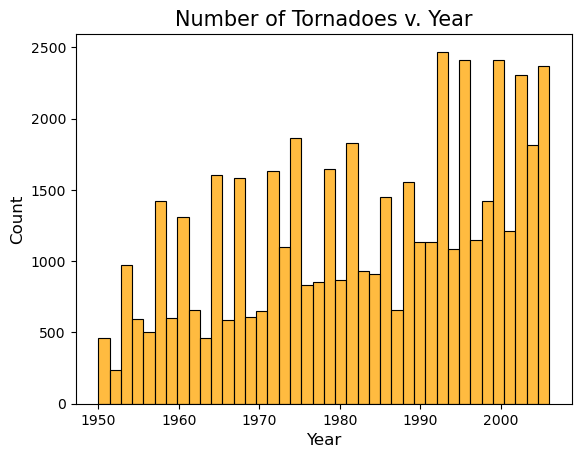

In [8]:
sns.histplot(fujita_scale, x='yr', color='orange')
plt.xlabel('Year', fontdict={'fontsize': 12})
plt.ylabel('Count', fontdict={'fontsize': 12})
plt.title('Number of Tornadoes v. Year', fontdict={'fontsize': 15})
plt.show()

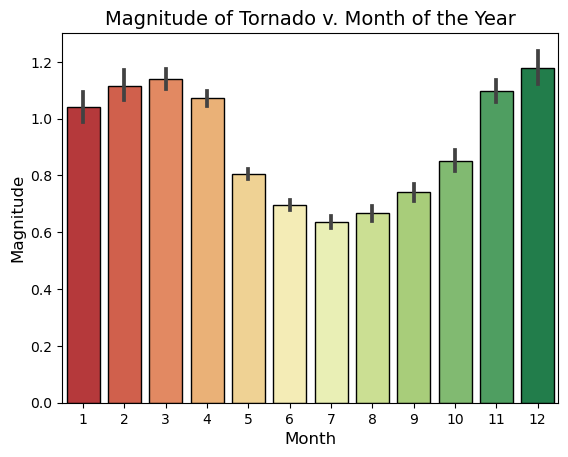

In [9]:
sns.barplot(fujita_scale, x='mo', y='mag', palette='RdYlGn', edgecolor='black')
plt.xlabel('Month', fontdict={'fontsize': 12})
plt.ylabel('Magnitude', fontdict={'fontsize': 12})
plt.title('Magnitude of Tornado v. Month of the Year', fontdict={'fontsize': 14})
plt.show()

Group by State...

In [10]:
state_grouped = fujita_scale.groupby('st').mean().sort_values('mag', ascending=False).reset_index()

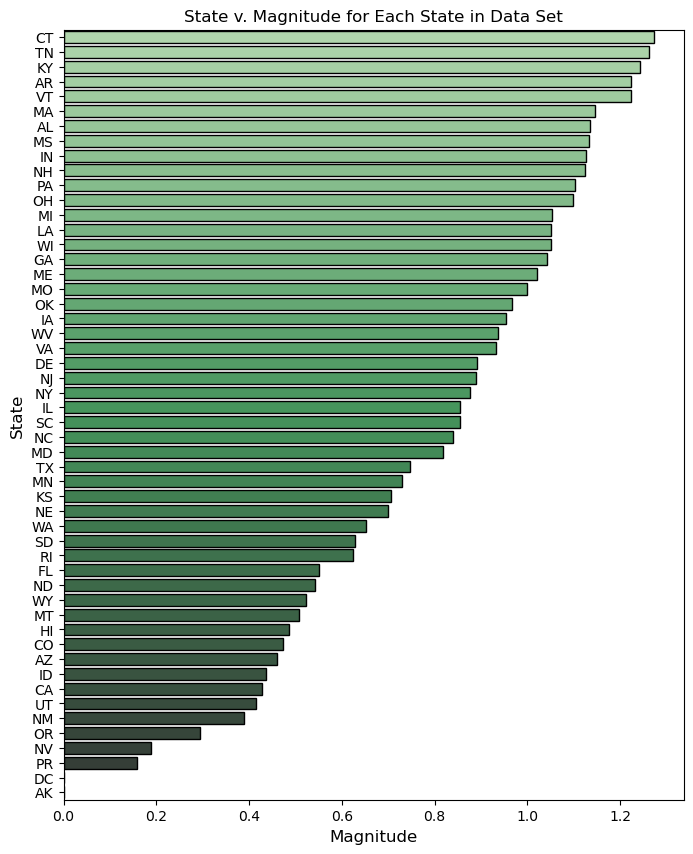

In [11]:
# State Vs. Magnitude Distribution
plt.figure(figsize=(8, 10))
sns.barplot(state_grouped, x='mag', y='st', palette='Greens_d', edgecolor='black')
plt.xlabel('Magnitude', fontdict={'fontsize': 12})
plt.ylabel('State', fontdict={'fontsize': 12})
plt.title('State v. Magnitude for Each State in Data Set')
plt.show()

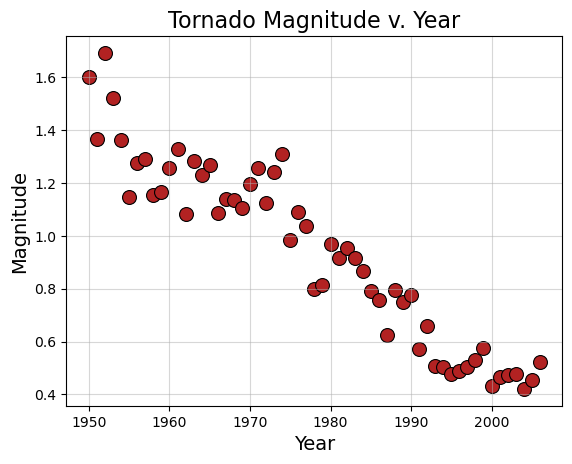

In [12]:
years = fujita_scale.groupby('yr')['mag'].mean()
sns.scatterplot(years, color='firebrick', s=100, edgecolor='black')
plt.title('Tornado Magnitude v. Year', fontdict={'fontsize': 16})
plt.xlabel('Year', fontdict={'fontsize': 14})
plt.ylabel('Magnitude', fontdict={'fontsize': 14})
plt.grid(alpha=0.5)

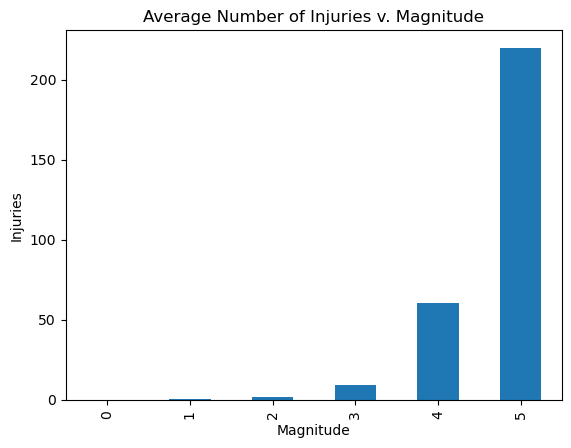

In [13]:
injuries = fujita_scale.groupby('mag')['inj'].mean()
injuries.plot(kind='bar')
plt.xlabel('Magnitude')
plt.ylabel('Injuries')
plt.title('Average Number of Injuries v. Magnitude')
plt.show()

/var/folders/kp/ts5ycnj15r769yyfz91zfmhw0000gn/T/ipykernel_11433/3252429283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fujita_scale['damages'] = fujita_scale['inj'] + fujita_scale['fat']


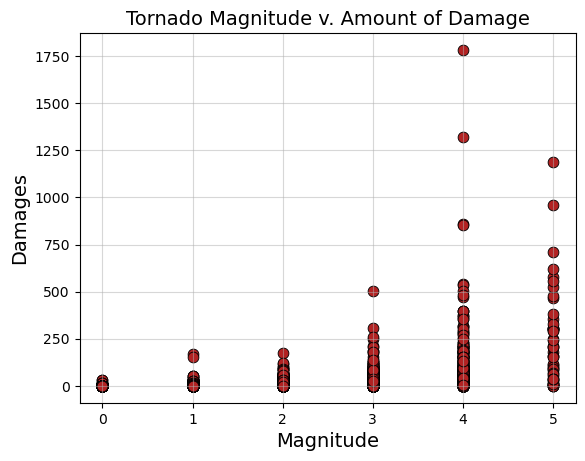

In [14]:
fujita_scale['damages'] = fujita_scale['inj'] + fujita_scale['fat']
sns.scatterplot(fujita_scale, x='mag', y='damages', color='firebrick', s=60, edgecolor='black')
plt.title('Tornado Magnitude v. Amount of Damage', fontdict={'fontsize': 14})
plt.xlabel('Magnitude', fontdict={'fontsize': 14})
plt.ylabel('Damages', fontdict={'fontsize': 14})
plt.grid(alpha=0.5)
plt.show()

This plot doesn't show the amount of points as easily, so I will jitter the points to make it easier to read.

In [15]:
x_jitter = np.random.normal(0, 0.05, size=len(fujita_scale['damages']))
y_jitter = np.random.normal(0, 15, size=len(fujita_scale['damages']))

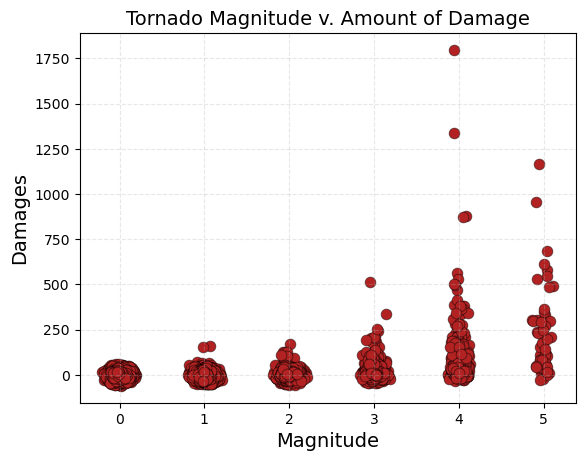

In [16]:
sns.scatterplot(x=fujita_scale['mag'] + x_jitter, y=fujita_scale['damages'] + y_jitter, color='firebrick', s=60, edgecolor=(0, 0, 0, 0.5))
plt.title('Tornado Magnitude v. Amount of Damage', fontdict={'fontsize': 14})
plt.xlabel('Magnitude', fontdict={'fontsize': 14})
plt.ylabel('Damages', fontdict={'fontsize': 14})
plt.grid(alpha=0.3, linestyle='--')

### Conclusion on Exploration

**Initial Impressions:** These plots seem to suggest that the amount of tornadoes has gone up over the years, yet the magnitude of these events has had a significant decrease. I wonder if there is a climate factor that affects the frequency or magnitude of tornadoes?. However, my main point of inquiry for this project is the association between magnitude, frequency/location of the tornadoes and their damage impacts. Looking at my plot, a positive association can be noticed between higher magnitude tornadoes and fatality/injury counts.

I am interested in exploring more about what kind of association the location and the magnitude of the tornados has on the number of injuries and deaths from each storm.

## Inference

I want to start by comparing how different features associate with the amount of damage cause during an event.

In [17]:
# Comparing length of tornado path to damages
tornado_damage_by_length = fujita_scale.copy()
tornado_damage_by_length.head()

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid,damages
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130,3
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150,3
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10,1
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17,2
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100,0


In [18]:
# Setting palette for magnitude
mag_palette = 'autumn_r'
edge_color = (0, 0, 0, 0.5)

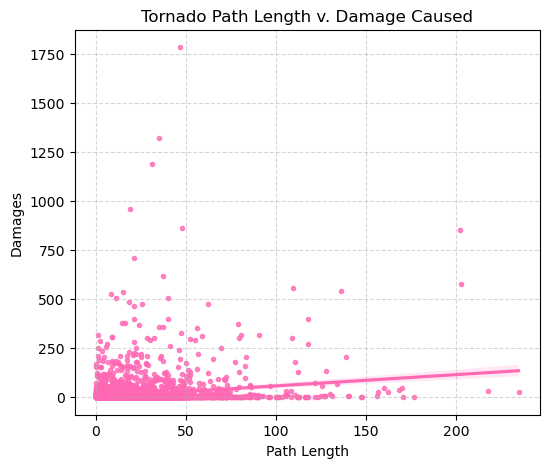

In [19]:
plt.figure(figsize=(6,5))

sns.regplot(tornado_damage_by_length, x='len', y='damages', color='hotpink', marker='.')
plt.title('Tornado Path Length v. Damage Caused')
plt.xlabel('Path Length')
plt.ylabel('Damages')

plt.grid(alpha=0.5, linestyle='--')
plt.show()

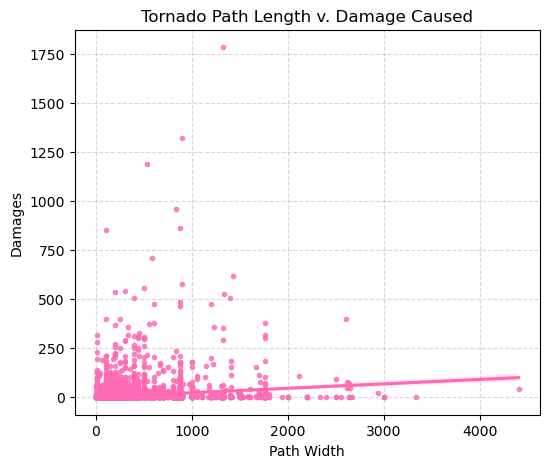

In [20]:
plt.figure(figsize=(6,5))

sns.regplot(tornado_damage_by_length, x='wid', y='damages', color='hotpink', marker='.')
plt.title('Tornado Path Length v. Damage Caused')
plt.xlabel('Path Width')
plt.ylabel('Damages')

plt.grid(alpha=0.5, linestyle='--')
plt.show()

Now that I have determined that there is not a strong association between length and width of tornadoes, and their damage, I will compare location/magnitude with damages.

### My Hypotheses

**Null Hypothesis:** There is no association between the magnitude of a tornado event and the amount of damage caused to the community.

**Alternate Hypothesis:** There is a positive association between the magnitude of a tornado event and the amount of damages caused to the community.

In [21]:
# Top 5 States with most magnitude 4 and 5 tornadoes.
fujita_scale[(fujita_scale['mag'] == 5) | (fujita_scale['mag'] == 4)]['st'].value_counts().head()

st
TX    50
OK    50
IA    42
KS    36
MO    32
Name: count, dtype: int64

In [22]:
# Plotting these 5 states
states = ['TX', 'OK', 'IA', 'KS', 'MO']
mag_states = fujita_scale[fujita_scale['st'].isin(states)]
mag_states

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid,damages
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.50,150,3
5,1950,1,25,1950-01-25,MO,2,5,0,37.60,-90.68,37.63,-90.65,2.30,300,5
6,1950,1,26,1950-01-26,TX,2,2,0,26.88,-98.12,26.88,-98.05,4.70,133,2
7,1950,2,11,1950-02-11,TX,2,0,0,29.42,-95.25,29.52,-95.13,9.90,400,0
8,1950,2,11,1950-02-11,TX,2,5,0,32.35,-95.20,32.42,-95.20,4.60,100,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49289,2006,12,29,2006-12-29,TX,1,0,0,31.78,-95.63,31.94,-95.65,11.26,100,0
49290,2006,12,29,2006-12-29,TX,2,0,0,31.78,-97.51,31.88,-97.47,7.14,300,0
49291,2006,12,29,2006-12-29,TX,2,0,0,32.09,-97.40,32.20,-97.34,7.95,587,0
49292,2006,12,29,2006-12-29,TX,2,12,0,31.24,-95.98,31.26,-95.98,14.70,587,12


In [23]:
print(f"The average number of fatalities and injuries for the tornado events in states with the average largest magnitude storms is {(mag_states['damages'].mean())}")

The average number of fatalities and injuries for the tornado events in states with the average largest magnitude storms is 1.237517498833411


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


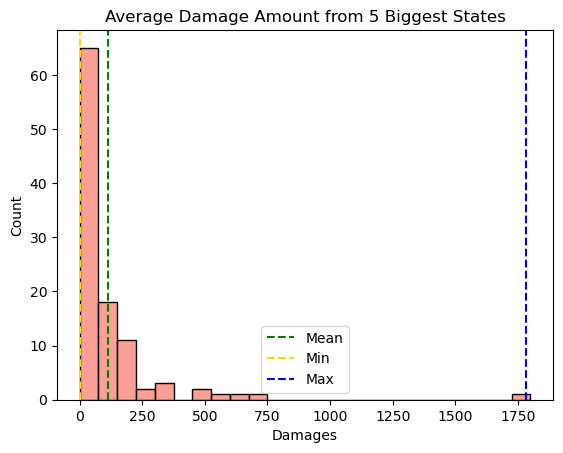

In [24]:
damage = mag_states.groupby(by='damages').min().reset_index()

sns.histplot(damage, x='damages', binwidth=75, color='salmon')
plt.title('Average Damage Amount from 5 Biggest States')
plt.xlabel('Damages')

plt.axvline(damage['damages'].mean(), color='green', linestyle='--', label='Mean')
plt.axvline(damage['damages'].min(), color='gold', linestyle='--', label='Min')
plt.axvline(damage['damages'].max(), color='blue', linestyle='--', label='Max')

plt.legend()
plt.show()

On this plot we can see that, even though these states have the highest magnitudes out of our whole dataset, the average distribution of damages is heavily skewed toward the lower end, with a singular outlier being our maximum value.

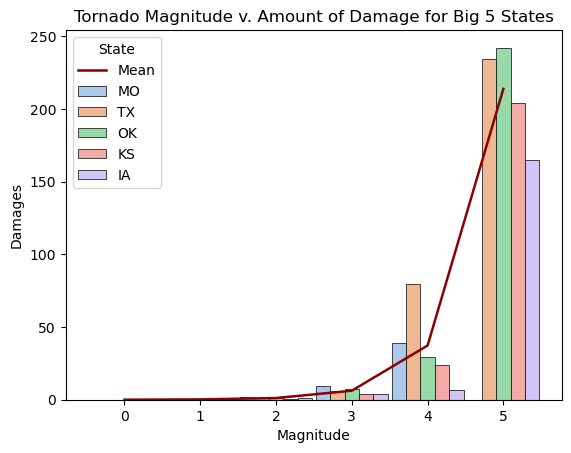

In [25]:
mag_means = mag_states.groupby(by='mag')['damages'].mean()

sns.barplot(mag_states, x='mag', y='damages', hue='st', palette='pastel', width=0.95, edgecolor='black', linewidth=0.5, errorbar=None)
plt.plot(mag_means, color='darkred', linewidth=1.8, label='Mean')
plt.title('Tornado Magnitude v. Amount of Damage for Big 5 States')
plt.xlabel('Magnitude')
plt.ylabel('Damages')

plt.legend(title='State')
plt.show()

**Conclusion:** By plotting the magnitude of the tornadoes from our Big 5 States against the amount of damages, I can see there is a clear association between damages and magnitude. With this visualization I am fairly confident in rejecting my null hypothesis. Some potential biases in the data include, the splitting of my original dataset into fujita scale and enhanced fujita scale. This could cause my plot to not be as accurate because there are not enough data point from recent years to account for. Overall though, I feel as though the data met my assumptions just fine, and I feel confident in my findings.

#### Using K-Means Clustering:

I am using K-Means clustering to explore the relationship between location and magnitude.

For K-Means I will be using a cleaner version of my data set - with just the state name, the latitude, longitude, magnitude, and damages.

In [26]:
mag_states_clean = mag_states[['st', 'slat', 'slon', 'mag', 'damages']].rename(columns=({'st': 'state', 'slat': 'lat', 'slon': 'lon'}))
mag_states_clean.head()

,state,lat,lon,mag,damages
1,MO,38.77,-90.22,3,3
5,MO,37.60,-90.68,2,5
6,TX,26.88,-98.12,2,2
7,TX,29.42,-95.25,2,0
8,TX,32.35,-95.20,2,5


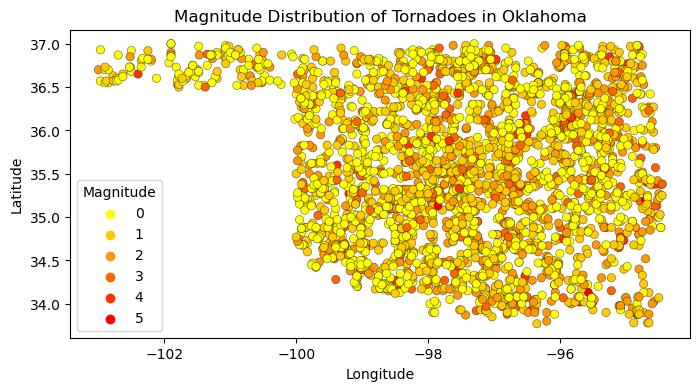

In [27]:
plt.figure(figsize=(8, 4))

sns.scatterplot(fujita_scale[fujita_scale['st'] == 'OK'], x='slon', y='slat', hue='mag', palette=mag_palette, edgecolor=edge_color)
plt.title('Magnitude Distribution of Tornadoes in Oklahoma')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Magnitude')
plt.show()

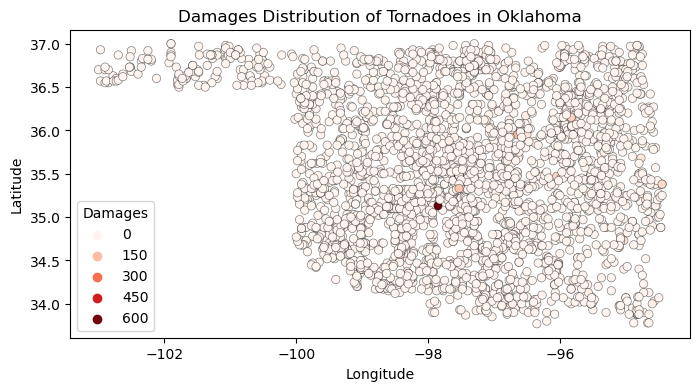

In [28]:
plt.figure(figsize=(8, 4))

sns.scatterplot(mag_states_clean[mag_states['st'] == 'OK'], x='lon', y='lat', hue='damages', palette='Reds', edgecolor=edge_color)
plt.title('Damages Distribution of Tornadoes in Oklahoma')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Damages')
plt.show()

From these two plots of Oklahoma, it is fairly clear that there are not any exceptionally strong clusters of tornado magnitudes. However we can tell from this, a relative idea of how magnitude affects damages.

In [29]:
# Mean latitudes and longitudes of each state for labeling
state_lats = mag_states_clean.groupby(by='state')['lat'].mean()
state_longs = mag_states_clean.groupby(by='state')['lon'].mean()

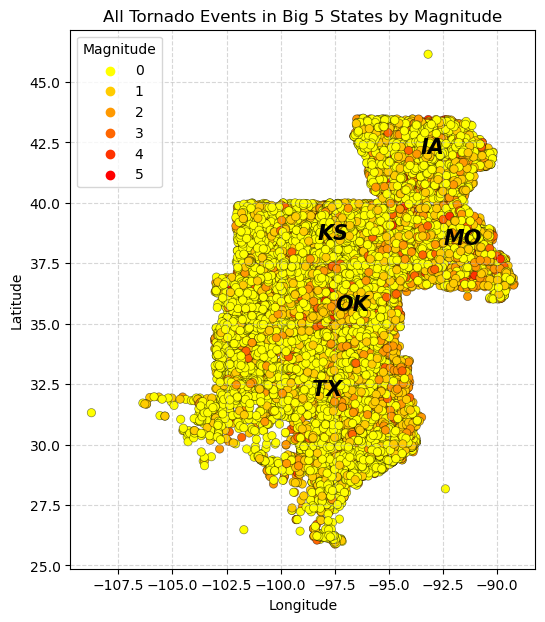

In [30]:
plt.figure(figsize=(6, 7))

sns.scatterplot(mag_states_clean, x='lon', y='lat', hue='mag', palette=mag_palette, edgecolor=edge_color)
plt.title('All Tornado Events in Big 5 States by Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(title='Magnitude')
plt.grid(alpha=0.5, linestyle='--')

#label the states
for state in mag_states_clean['state'].unique():
    plt.text(state_longs[state], state_lats[state], state, fontsize=15, fontstyle='oblique', fontweight='bold')

Here is a plot of all our Big 5 States, colored by event magnitude. It is really hard to tell with the amount of points what coloration each dot has, and if there are any prominent locational clusters. So I will further clean my data to only include the events of magnitude 3 and higher.

In [31]:
# filtering for events of only magnitude 3, 4 & 5
mag_tweak = mag_states_clean[mag_states_clean['mag'] >=3]

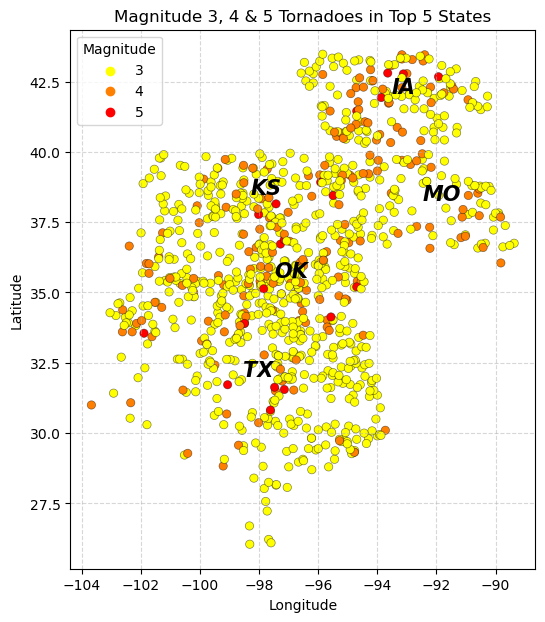

In [32]:
plt.figure(figsize=(6, 7))

sns.scatterplot(mag_tweak, x='lon', y='lat', hue='mag', palette=mag_palette, edgecolor=edge_color)
plt.title('Magnitude 3, 4 & 5 Tornadoes in Top 5 States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(alpha=0.5, linestyle='--')
plt.legend(title='Magnitude')

#label the states
for state in mag_tweak['state'].unique():
    plt.text(state_longs[state], state_lats[state], state, fontsize=15, fontstyle='oblique', fontweight='bold')

Next, I categorize the amount of damages into four categories so that I can use K-Means to try and decifer any associations.

In [33]:
# Cluster categorization function
def categorize_value(value):
    if value <= 100:
        return 0
    elif 100 < value <= 200:
        return 1
    elif 200 < value <= 300:
        return 2
    elif value > 300:
        return 3
    
mag_tweak['damage_category'] = mag_tweak['damages'].apply(categorize_value)

/var/folders/kp/ts5ycnj15r769yyfz91zfmhw0000gn/T/ipykernel_11433/507049568.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mag_tweak['damage_category'] = mag_tweak['damages'].apply(categorize_value)


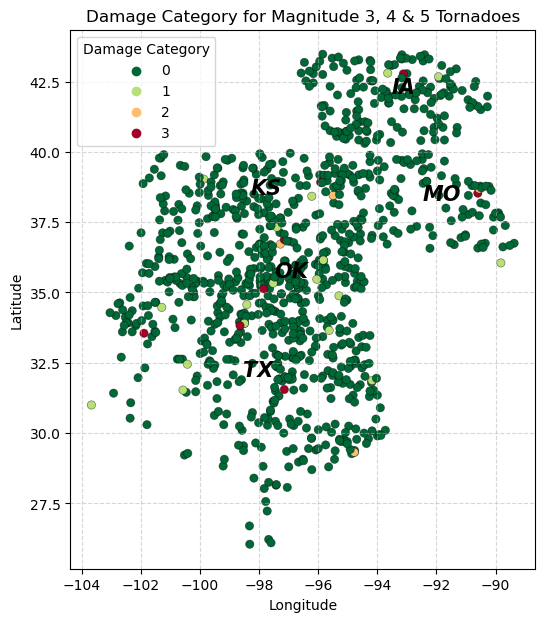

In [34]:
plt.figure(figsize=(6, 7))

sns.scatterplot(mag_tweak, x='lon', y='lat', hue='damage_category', palette='RdYlGn_r', edgecolor=edge_color)
plt.title('Damage Category for Magnitude 3, 4 & 5 Tornadoes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(title='Damage Category')
plt.grid(alpha=0.5, linestyle='--')

for state in mag_states_clean['state'].unique():
    plt.text(state_longs[state], state_lats[state], state, fontsize=15, fontstyle='oblique', fontweight='bold')

Now, using K-Means I will 

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

P = mag_tweak[['lon', 'lat', 'mag', 'damage_category']]

scaler = StandardScaler()

P_stand = scaler.fit_transform(P)

In [36]:
value_clusters = KMeans(n_clusters=3)

P['Cluster'] = value_clusters.fit_predict(P_stand)

P["Cluster"] = P['Cluster'].astype("category")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/kp/ts5ycnj15r769yyfz91zfmhw0000gn/T/ipykernel_11433/4082459760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P['Cluster'] = value_clusters.fit_predict(P_stand)
/var/folders/kp/ts5ycnj15r769yyfz91zfmhw0000gn/T/ipykernel_11433/4082459760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

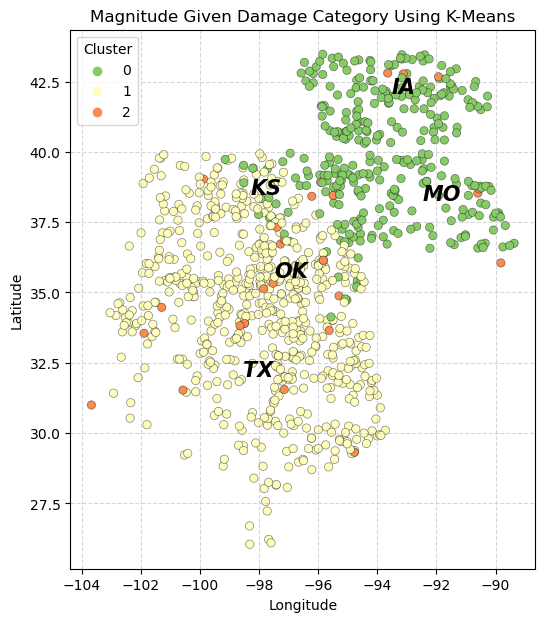

In [37]:
plt.figure(figsize=(6, 7))

sns.scatterplot(P, x='lon', y='lat', hue='Cluster', palette='RdYlGn_r', edgecolor=edge_color)
plt.title('Magnitude Given Damage Category Using K-Means')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(alpha=0.5, linestyle='--')

for state in mag_states_clean['state'].unique():
    plt.text(state_longs[state], state_lats[state], state, fontsize=15, fontstyle='oblique', fontweight='bold')

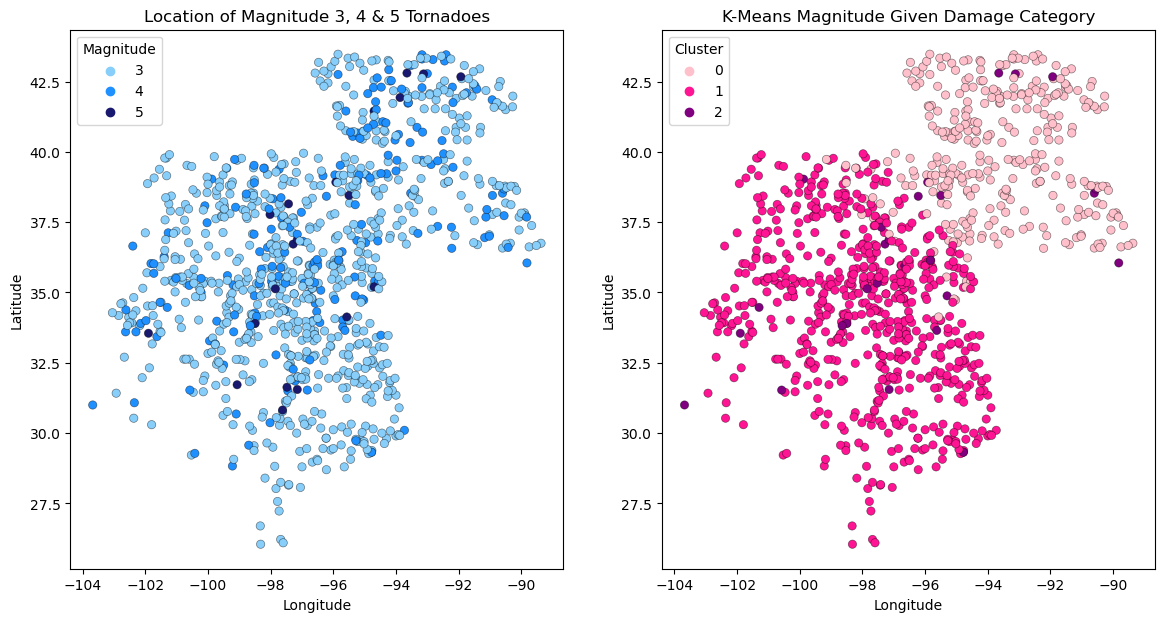

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Two plots showing the comparison between magnitude of a tornado, and its damage category
sns.scatterplot(mag_tweak, x='lon', y='lat', hue='mag', 
                palette=['lightskyblue', 'dodgerblue', 'midnightblue'], edgecolor=edge_color, 
                ax=axes[0])
axes[0].set_title('Location of Magnitude 3, 4 & 5 Tornadoes')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

sns.scatterplot(P, x='lon', y='lat', hue='Cluster', 
                palette=['pink', 'deeppink', 'purple'], edgecolor=edge_color,
                ax=axes[1])
axes[1].set_title('K-Means Magnitude Given Damage Category')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

axes[0].legend(title='Magnitude')
axes[1].legend(title='Cluster')

plt.show()

**Conclusion:** K-means operates by minimizing the variance within clusters, grouping data points based on distance in feature space. It doesn't consider relationships between the input (magnitude) and the desired output (damage). This limitation makes it unsuitable for tasks requiring a cause-effect or predictive approach. The lack of association between these factors can be identified in many ways, however, by using K-Means clustering I have concluded that there is no strong association between location and magnitude of tornadoes. 

## Prediction

I will now being using a linear regression model for my prediction section. Since I have concluded that there is an association between magnitude and damages, and that there is not an association between location and magnitude, I will be training my model to predict the magnitude of a singular event, based on what its amount of damage was.

#### Linear Regression:

Linear regression is a good option for predicting tornado damage based on magnitude. It’s a straightforward technique that can be easily interpreted, making it a good choice when there’s a clear linear relationship between the two variables. In my Inference section I showed that there is a strong association between magnitude and damages so linear regression will be more than sufficient.

In [39]:
# using a copy of the fujita_scale dataframe
fujita_scale_lin = fujita_scale.copy()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# Splitting the data
X = fujita_scale_lin[['damages']]
y = fujita_scale_lin['mag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

In [43]:
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

Intercept: 0.8218363171580043
Coefficient: 0.011437968155729113


I am using MSE to quantify the performance of my linear regression model.

In [44]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.8037781558289544
R^2 Score: 0.039774394222963694


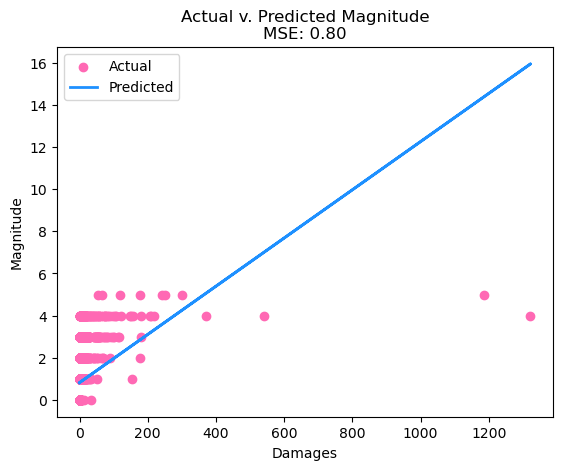

In [45]:
plt.scatter(X_test, y_test, label='Actual', color='hotpink')
plt.plot(X_test, y_pred, label='Predicted', linewidth=2, color='dodgerblue')
plt.xlabel('Damages')
plt.ylabel('Magnitude')
plt.title(f"Actual v. Predicted Magnitude\nMSE: {mse:.2f}")
plt.legend()
plt.show()


**Conclusion:** Using this model, I fairly accurate results! With a mean squared error of 0.8, on average, the squared difference between the predicted values and the actual values in my model is 0.8 units squared. This is a relatively low value indicating that the model is making fairly accurate predictions, with smaller errors on average.

Though my model does make accurate predictions, it tragically underfit. Obviously the scale of the magnitudes it is predicting for increasing number of damages is off (the scale of magnitudes only goes up to 6), however, it still shows a positive association which I confirmed in my precious analyses. Some factors that could have affected the accuracy of my model are the use of the fujita scale, and not having accurate wind speed measurements. The fujita scale is based on wind speed, which my dataset does not include, this could affect the accuracy of the magnitude classification of each event, thus impacting the fitting and prediction of my model.

This model would be useful in helping people stay safe during strong tornado events. Because I classified "Damages" as the sum of injuries plus fatalities from an event, this model could warn people who are in the projected path of a strong tornado that they are in danger, assuming we know the magnitude of the event. This could help in engineering better storm shelters or early warning systems. 
